<a href="https://colab.research.google.com/github/Saket22-CS/Saket-Infosys-Nov24/blob/main/FutureCart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis and Data Preprocessing for Sales Data
## Project Overview
This project involves performing Exploratory Data Analysis (EDA) and data preprocessing on sales data. Our goal is to clean and prepare the data, identify trends and patterns, and gain insights through visualizations. This analysis will include handling missing values, identifying and treating outliers, and understanding correlations between different variables.

## Objectives:
- Ensure the sales data is in a time series format.
- Clean and format the data, addressing missing values and outliers.
- Visualize data distributions and trends over time.
- Identify relationships between variables through correlation analysis.
- Summarize the data with key statistical metrics.


## Step 1: Importing Required Libraries
This section includes importing essential Python libraries for data manipulation, visualization, and analysis. These libraries will help in loading the data, creating visualizations, and performing statistical analysis.


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Setting visualization style
plt.style.use('seaborn-darkgrid')
sns.set_palette('viridis')


## Step 2: Loading the Data
We load the data from Excel files into Pandas DataFrames. Each file represents a different aspect of the sales data (e.g., sales quantity, Google clicks, and Facebook impressions).


In [ ]:
# Loading Excel files into DataFrames
sales_data = pd.read_excel('/content/ProductA.xlsx')
google_clicks = pd.read_excel('/content/ProductA_google_clicks.xlsx')
fb_impressions = pd.read_excel('/content/ProductA_fb_impressions.xlsx')

# Displaying the first few rows of each dataset for an initial look
print("Sales Data:")
display(sales_data.head())

print("Google Clicks Data:")
display(google_clicks.head())

print("Facebook Impressions Data:")
display(fb_impressions.head())


Sales Data:


,Day Index,Quantity
0,2021-12-01,14
1,2021-12-02,10
2,2021-12-03,13
3,2021-12-04,22
4,2021-12-05,33


Google Clicks Data:


,Day Index,Clicks
0,2021-12-01,445
1,2021-12-02,433
2,2021-12-03,424
3,2021-12-04,427
4,2021-12-05,451


Facebook Impressions Data:


,Day Index,Impressions
0,2021-12-01,620
1,2021-12-02,890
2,2021-12-03,851
3,2021-12-04,881
4,2021-12-05,678


## Step 3: Data Cleaning and Preprocessing
### Explanation:
- **Handling Missing Values**: Missing data can skew the results and lead to inaccurate analyses. We fill missing values with the mean for simplicity.
- **Outlier Treatment**: Outliers can distort the data analysis. We use the IQR method to detect and treat outliers.
- **Datetime Conversion**: Ensuring that the `Day Index` column is in the correct format is crucial for time series analysis.



In [ ]:
# Checking for missing values
print("Missing values in Sales Data:")
print(sales_data.isnull().sum())

Missing values in Sales Data:
Day Index    0
Quantity     0
dtype: int64


In [ ]:
# Imputing missing values with mean (or choose a suitable method)
sales_data.fillna(sales_data.mean(), inplace=True)

# Identifying outliers using the IQR method and treating them
Q1 = sales_data['Quantity'].quantile(0.25)
Q3 = sales_data['Quantity'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (sales_data['Quantity'] < (Q1 - 1.5 * IQR)) | (sales_data['Quantity'] > (Q3 + 1.5 * IQR))
sales_data.loc[outlier_condition, 'Quantity'] = np.nan
sales_data['Quantity'].fillna(sales_data['Quantity'].mean(), inplace=True)

In [ ]:
# Converting the 'Day Index' column to datetime format if not already
sales_data['Day Index'] = pd.to_datetime(sales_data['Day Index'])

## Step 4: Merging Datasets
### Explanation:
We merge the sales, Google clicks, and Facebook impressions datasets to create a unified DataFrame for comprehensive analysis. The merge is based on the `Day Index` column to maintain time series alignment.



In [ ]:
# Merging datasets on the 'Date' column
merged_data = pd.merge(sales_data, google_clicks, on='Day Index', how='outer')
merged_data = pd.merge(merged_data, fb_impressions, on='Day Index', how='outer')

# Sorting by Date to ensure a time series format
merged_data.sort_values('Day Index', inplace=True)

# Displaying the merged dataset
print("Merged Data:")
display(merged_data.head())


Merged Data:


,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14.000000,445,620
1,2021-12-02,10.000000,433,890
2,2021-12-03,13.000000,424,851
3,2021-12-04,22.000000,427,881
4,2021-12-05,17.111111,451,678


## Step 5: Visualizing Data Distributions
### Explanation:
We use histograms with KDE (Kernel Density Estimation) to observe the distribution of key variables. This helps identify data trends and any skewness or abnormalities.


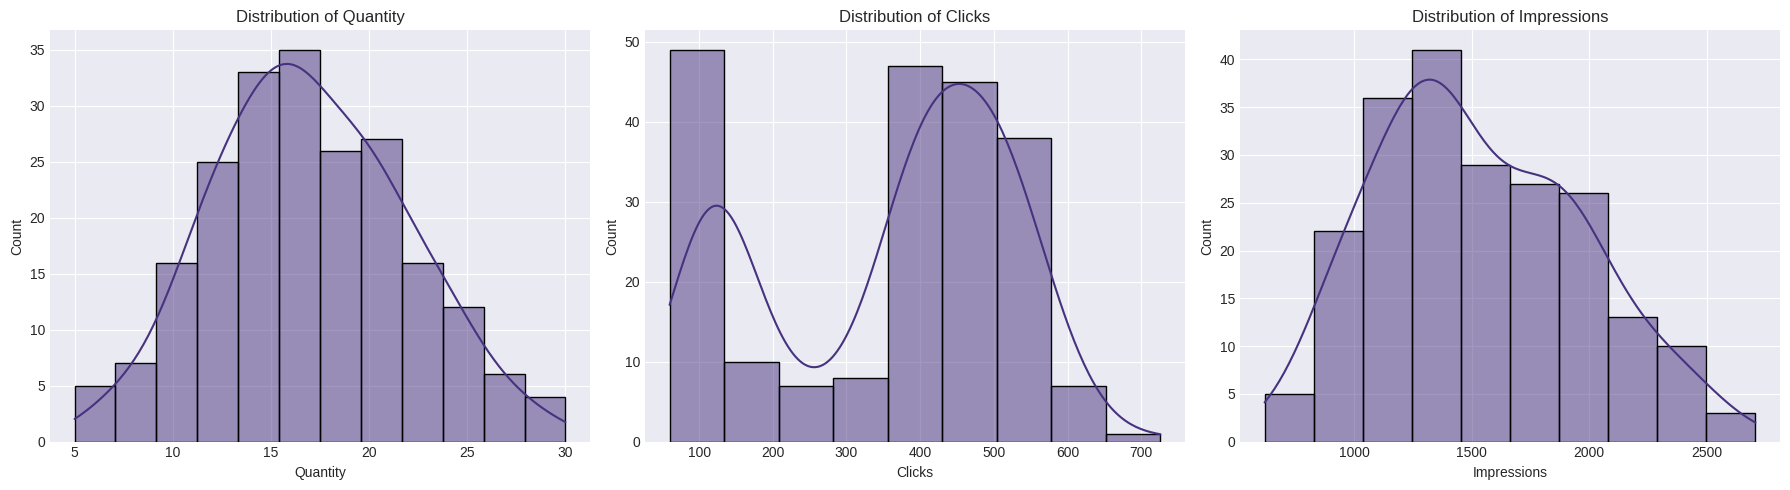

In [ ]:
# Plotting distribution plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(merged_data['Quantity'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Quantity')
axes[0].set_xlabel('Quantity')

sns.histplot(merged_data['Clicks'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Clicks')
axes[1].set_xlabel('Clicks')

sns.histplot(merged_data['Impressions'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Impressions')
axes[2].set_xlabel('Impressions')

plt.tight_layout()
plt.show()


### Explanation of Graphs:
- **Quantity Distribution**: Shows how sales quantities are spread and helps identify the most common sales values.
- **Clicks Distribution**: Highlights how many clicks are typically observed and the spread of data.
- **Impressions Distribution**: Indicates how often the product is shown in ads.


## Step 6: Time Series Analysis
### Explanation:
Time series plots are used to observe patterns, trends, and seasonality over time. This helps in forecasting and identifying cyclical behavior in the data.


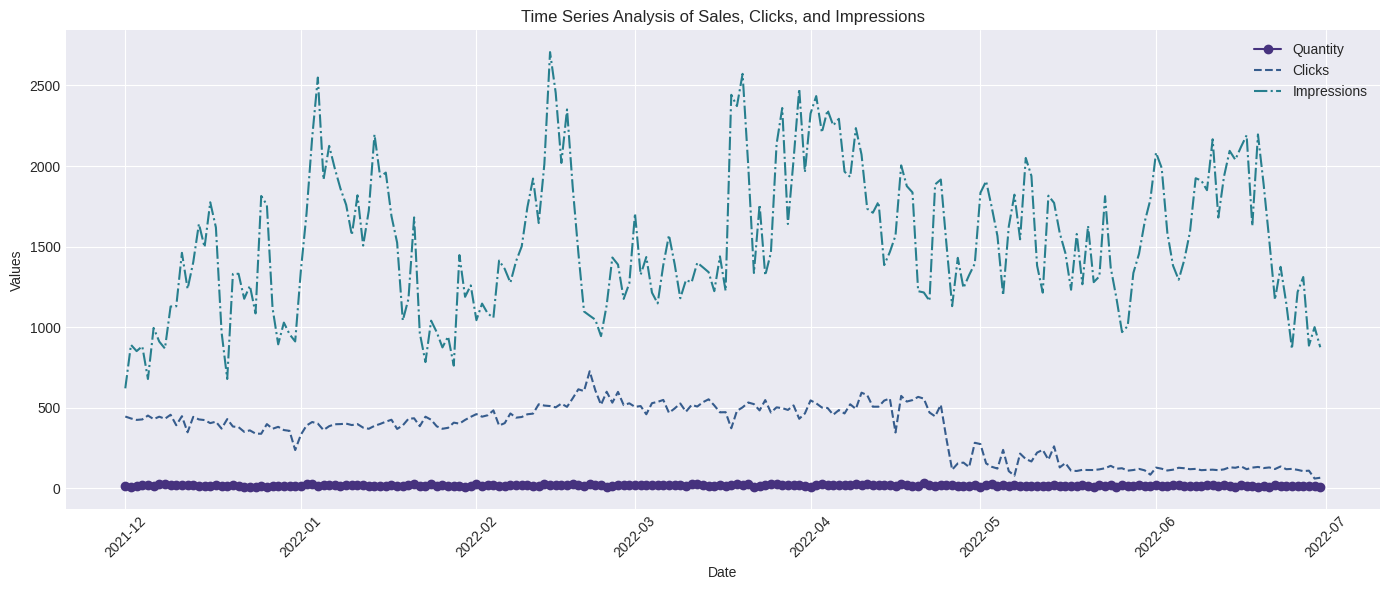

In [ ]:
# Plotting time series trends
plt.figure(figsize=(14, 6))
plt.plot(merged_data['Day Index'], merged_data['Quantity'], label='Quantity', marker='o')
plt.plot(merged_data['Day Index'], merged_data['Clicks'], label='Clicks', linestyle='--')
plt.plot(merged_data['Day Index'], merged_data['Impressions'], label='Impressions', linestyle='-.')

plt.title('Time Series Analysis of Sales, Clicks, and Impressions')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Explanation:
- **Trends**: Observes the overall growth or decline in sales, clicks, and impressions over time.
- **Seasonality**: Shows recurring patterns over time (e.g., monthly peaks).


## Step 7: Correlation Matrix
### Explanation:
The correlation matrix helps identify relationships between different variables in the data. Strong correlations may indicate a potential predictive relationship.



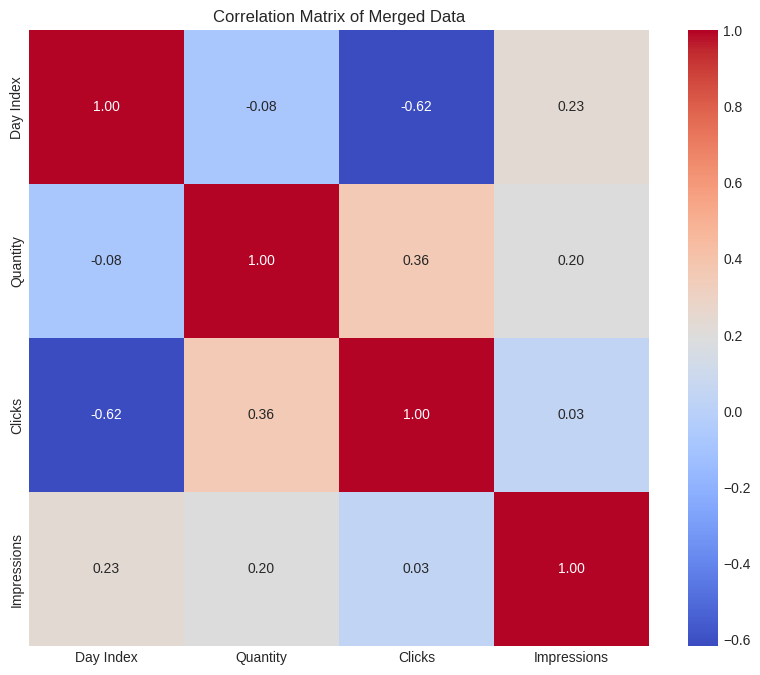

In [ ]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = merged_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Merged Data')
plt.show()


### Explanation of Correlation Matrix:
- **Positive Correlation**: Indicates that as one variable increases, the other tends to increase.
- **Negative Correlation**: Suggests that as one variable increases, the other tends to decrease.
- **No Correlation**: Shows no significant relationship between variables.


## Step 8: Statistical Summaries
### Explanation:
Reviewing statistical summaries provides insights into the central tendencies, spread, and outliers in the data.



In [ ]:
# Displaying statistical summaries
print("Statistical Summary of Merged Data:")
display(merged_data.describe())


Statistical Summary of Merged Data:


,Day Index,Quantity,Clicks,Impressions
count,212,212.000000,212.00000,212.000000
mean,2022-03-16 12:00:00,16.978836,358.20283,1531.702830
min,2021-12-01 00:00:00,5.000000,60.00000,620.000000
25%,2022-01-22 18:00:00,13.750000,154.00000,1209.750000
50%,2022-03-16 12:00:00,17.000000,402.50000,1460.000000
75%,2022-05-08 06:00:00,20.000000,492.75000,1862.000000
max,2022-06-30 00:00:00,30.000000,726.00000,2707.000000
std,NaN,4.878120,164.52160,440.660783


### Explanation of Statistical Summary:
- **Mean**: The average value.
- **Standard Deviation**: Indicates variability or dispersion.
- **Min/Max**: Shows the range of data.
- **Quartiles**: Useful for understanding the spread and detecting potential outliers.
- **Summary Metrics**: Provides an overview of central tendencies and variability in the data.
- **Key Observations**: Identify the range, mean, and standard deviation for different variables.
